In [8]:
%matplotlib notebook

import numpy
import os
from bp import competition, db
from matplotlib import pyplot

In [17]:
root = competition.DB_ROOT + 'train/'
paths = sorted(root + i.split('.')[0][:-2] for i in os.listdir(root) if '_x.flac' in i)
len(paths)

412820

In [110]:
data = [db.read_record(i) for i in paths[100:200]]

In [114]:
recs = [i for i in data if i.p_signal.shape[0] > 10**6 and 'II' in i.sig_name]
recs = recs[:4] + recs[8:]
len(recs)

20

In [253]:
list(range(2,10,3))

[2, 5, 8]

<IPython.core.display.Javascript object>


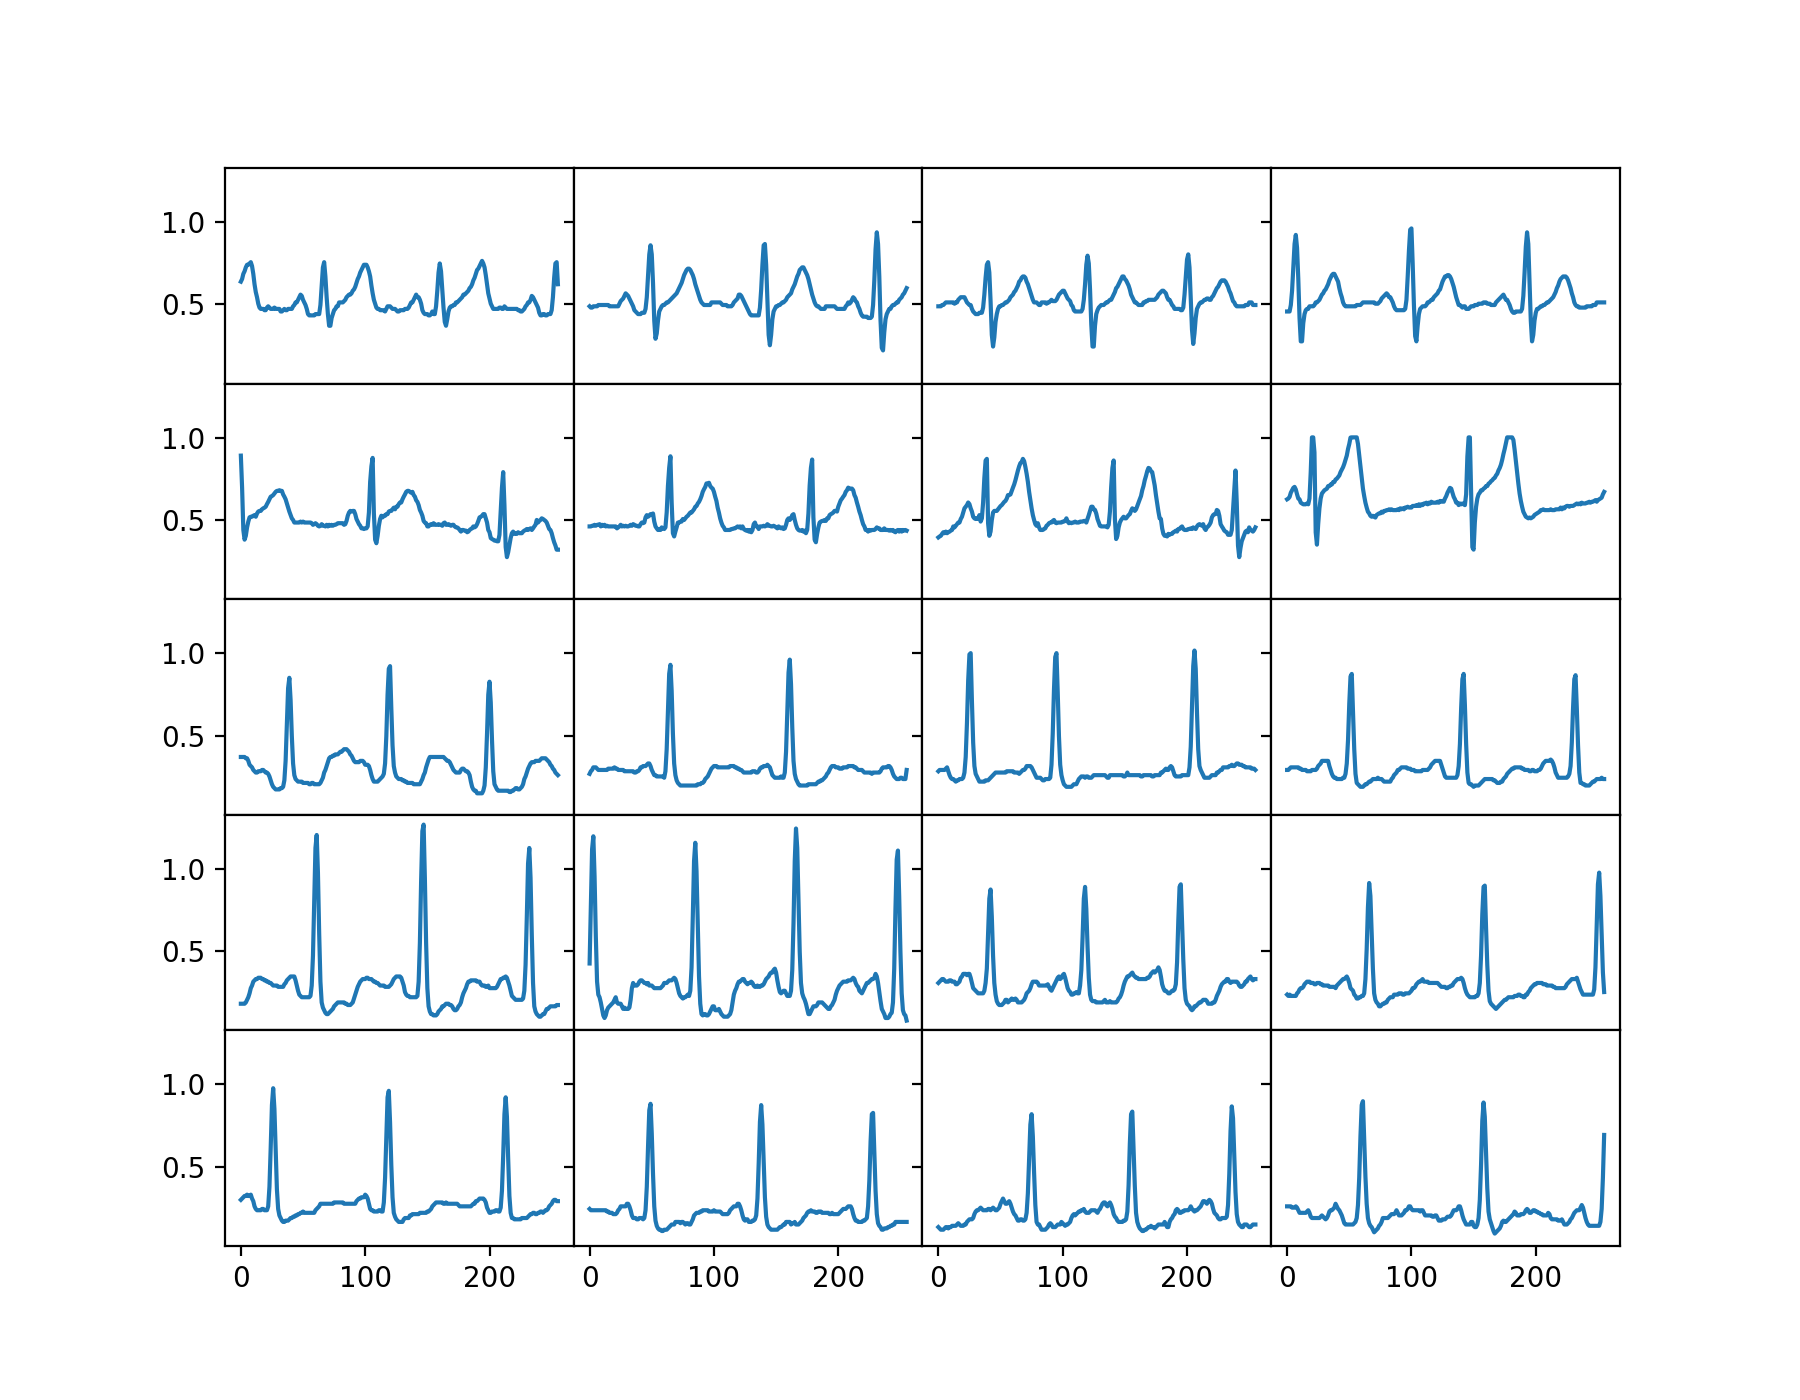

In [347]:
t0 = 5000
dt = 256
nc = 4
nr = len(recs) // nc
fig, ax = pyplot.subplots(nr, nc, sharex=True, sharey=True)
fig.set_figheight(nr + 2)
fig.set_figwidth(2*nc + 1)
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(nr * nc):
    x = recs[i].p_signal[:, recs[i].sig_name.index('II')]
    ax[i//nc, i %nc].plot(x[t0:t0+dt])

<IPython.core.display.Javascript object>


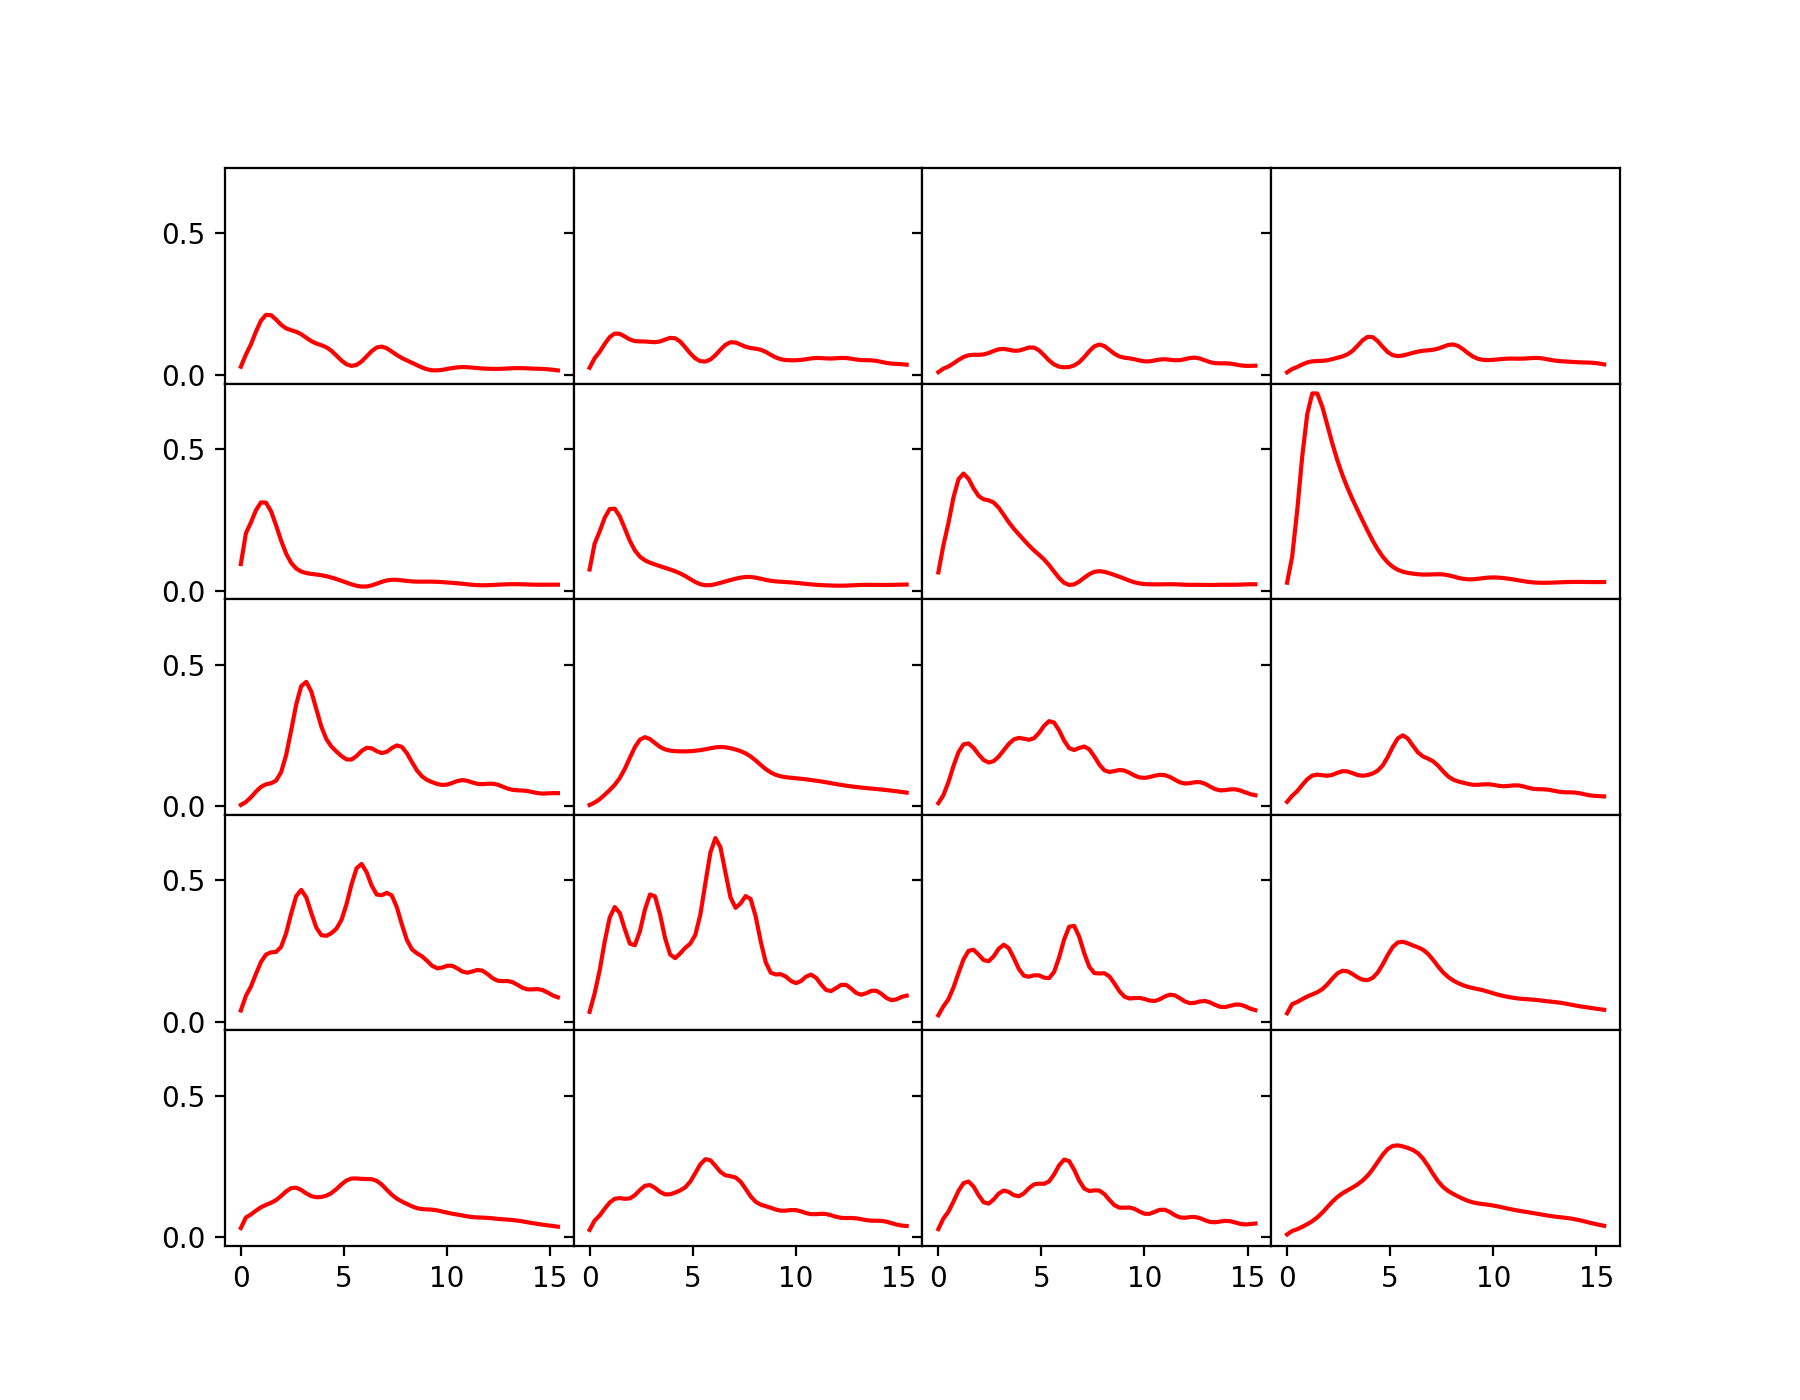

In [367]:
nf = 512
nt = 128

fig, ax = pyplot.subplots(nr, nc, sharex=True, sharey=True)
fig.set_figheight(nr + 2)
fig.set_figwidth(2*nc + 1)
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(nr * nc):
    x = recs[i].p_signal[:, recs[i].sig_name.index('II')][t0:t0+dt]
    f, z = signal.welch(x, nfft=nf, nperseg=nt, scaling='density')
    ax[i//nc, i%nc].plot(125*f[:nf//8], z[:nf//8], 'r')

In [378]:
x = numpy.arange(50)
dt = 7
fs = 3
X = numpy.lib.stride_tricks.as_strided(x, shape=(x.size // fs - 1, dt), strides=(fs*x.itemsize, x.itemsize))
X

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13, 14, 15],
       [12, 13, 14, 15, 16, 17, 18],
       [15, 16, 17, 18, 19, 20, 21],
       [18, 19, 20, 21, 22, 23, 24],
       [21, 22, 23, 24, 25, 26, 27],
       [24, 25, 26, 27, 28, 29, 30],
       [27, 28, 29, 30, 31, 32, 33],
       [30, 31, 32, 33, 34, 35, 36],
       [33, 34, 35, 36, 37, 38, 39],
       [36, 37, 38, 39, 40, 41, 42],
       [39, 40, 41, 42, 43, 44, 45],
       [42, 43, 44, 45, 46, 47, 48]])

<IPython.core.display.Javascript object>


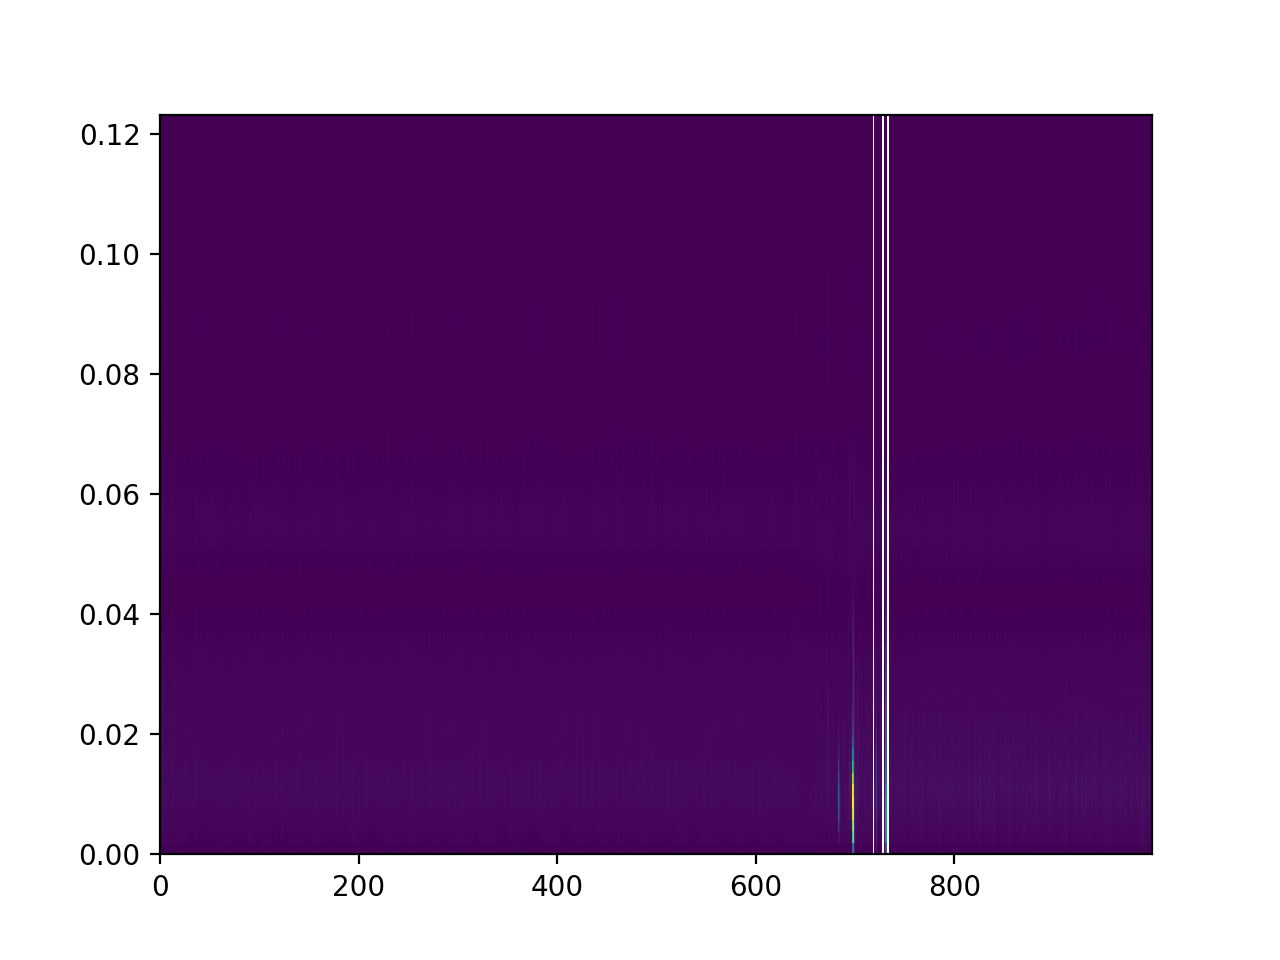

In [390]:
nf = 512
nt = 128
dt = 256
fs = 125
i = 0
x = recs[i].p_signal[:, recs[i].sig_name.index('II')].copy()
X = numpy.lib.stride_tricks.as_strided(x, shape=(x.size // fs - 1, dt), strides=(fs*x.itemsize, x.itemsize))
f, Z = signal.welch(X[:500], nfft=nf, nperseg=nt, scaling='density')
pyplot.figure()
pyplot.pcolormesh(numpy.arange(1000), f[:nf//8], numpy.transpose(Z[:1000, :nf//8]))
# f, t, z = signal.spectrogram(x[2**17:2**18], nperseg=nt, nfft=nf)
# pyplot.figure(figsize=(8, 2))
# pyplot.pcolormesh(t, f[:nf//8], z[:nf//8])

In [384]:
X[0].shape

(256,)

<IPython.core.display.Javascript object>


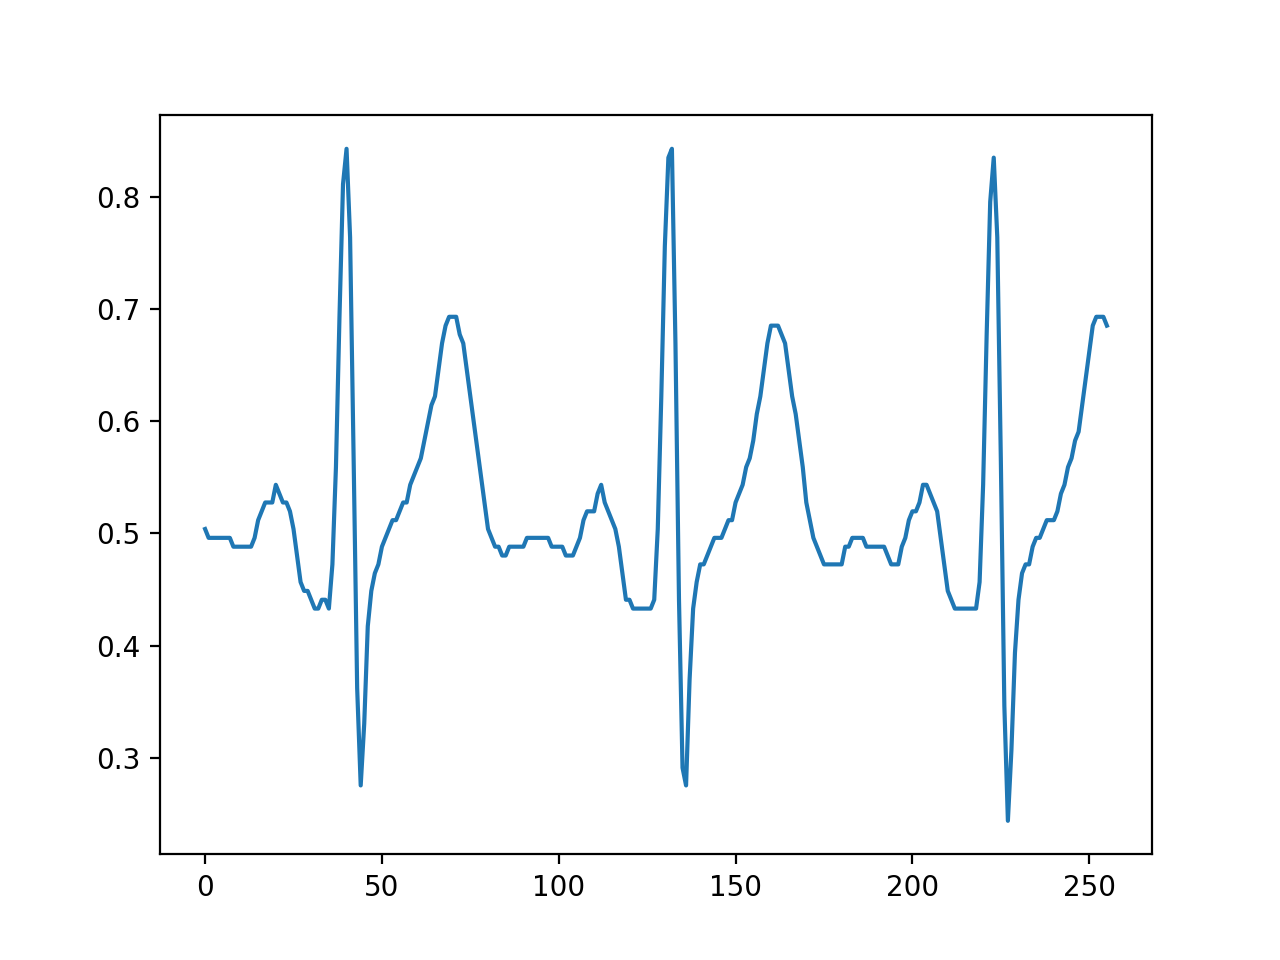

In [389]:
i = 1
x = recs[i].p_signal[:, recs[i].sig_name.index('II')].copy()
X = numpy.lib.stride_tricks.as_strided(x, shape=(x.size // fs - 1, dt), strides=(fs*x.itemsize, x.itemsize))
pyplot.figure()
pyplot.plot(X[1])

In [366]:
nf//8

64

In [365]:
f.shape

(257,)

In [360]:
Z.shape

(1000, 257)

<IPython.core.display.Javascript object>


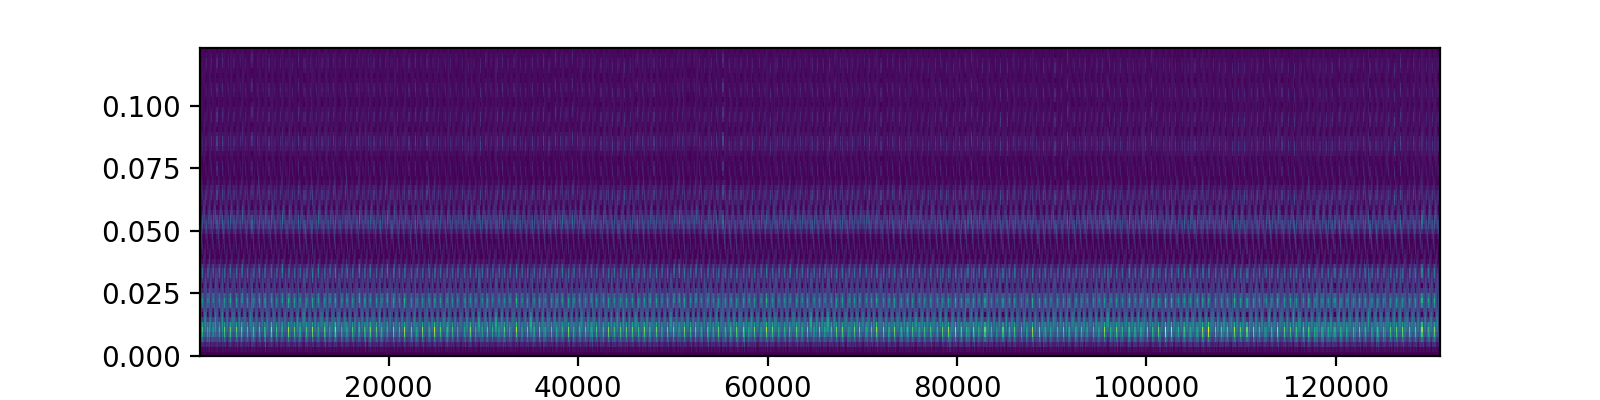

In [317]:
nf = 512
nt = 128
i = 0
x = recs[i].p_signal[:, recs[i].sig_name.index('II')]
f, t, z = signal.spectrogram(x[2**17:2**18], nperseg=nt, nfft=nf)
pyplot.figure(figsize=(8, 2))
pyplot.pcolormesh(t, f[:nf//8], z[:nf//8])

<IPython.core.display.Javascript object>


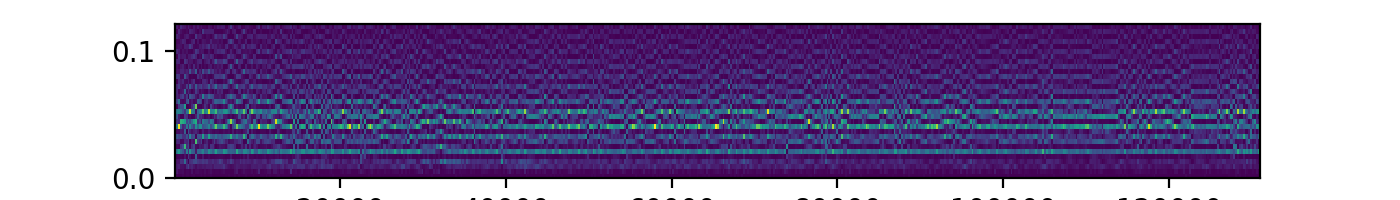

In [240]:
nt = 256
nf = 256
x = recs[-1].p_signal[:, recs[-1].sig_name.index('II')]
f, t, z = signal.spectrogram(x[2**17:2**18], nperseg=nt, nfft=nf)
pyplot.figure(figsize=(7, 1))
pyplot.pcolormesh(t, f[:nf//8], z[:nf//8])